In [ ]:
# Step 1: Set up environment (install dependencies)

In [1]:
!pip install opencv-python opencv-python-headless imutils


In [ ]:
# Step 2: Download pre-trained face detection model (Caffe based)

In [2]:
!wget -q https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt -O deploy.prototxt
!wget -q https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel -O res10_300x300_ssd_iter_140000.caffemodel


In [ ]:
# Step 3: Import libraries & Load the model & Detect faces in an image

Saving IMG_20250811_110413_881.webp to IMG_20250811_110413_881 (2).webp


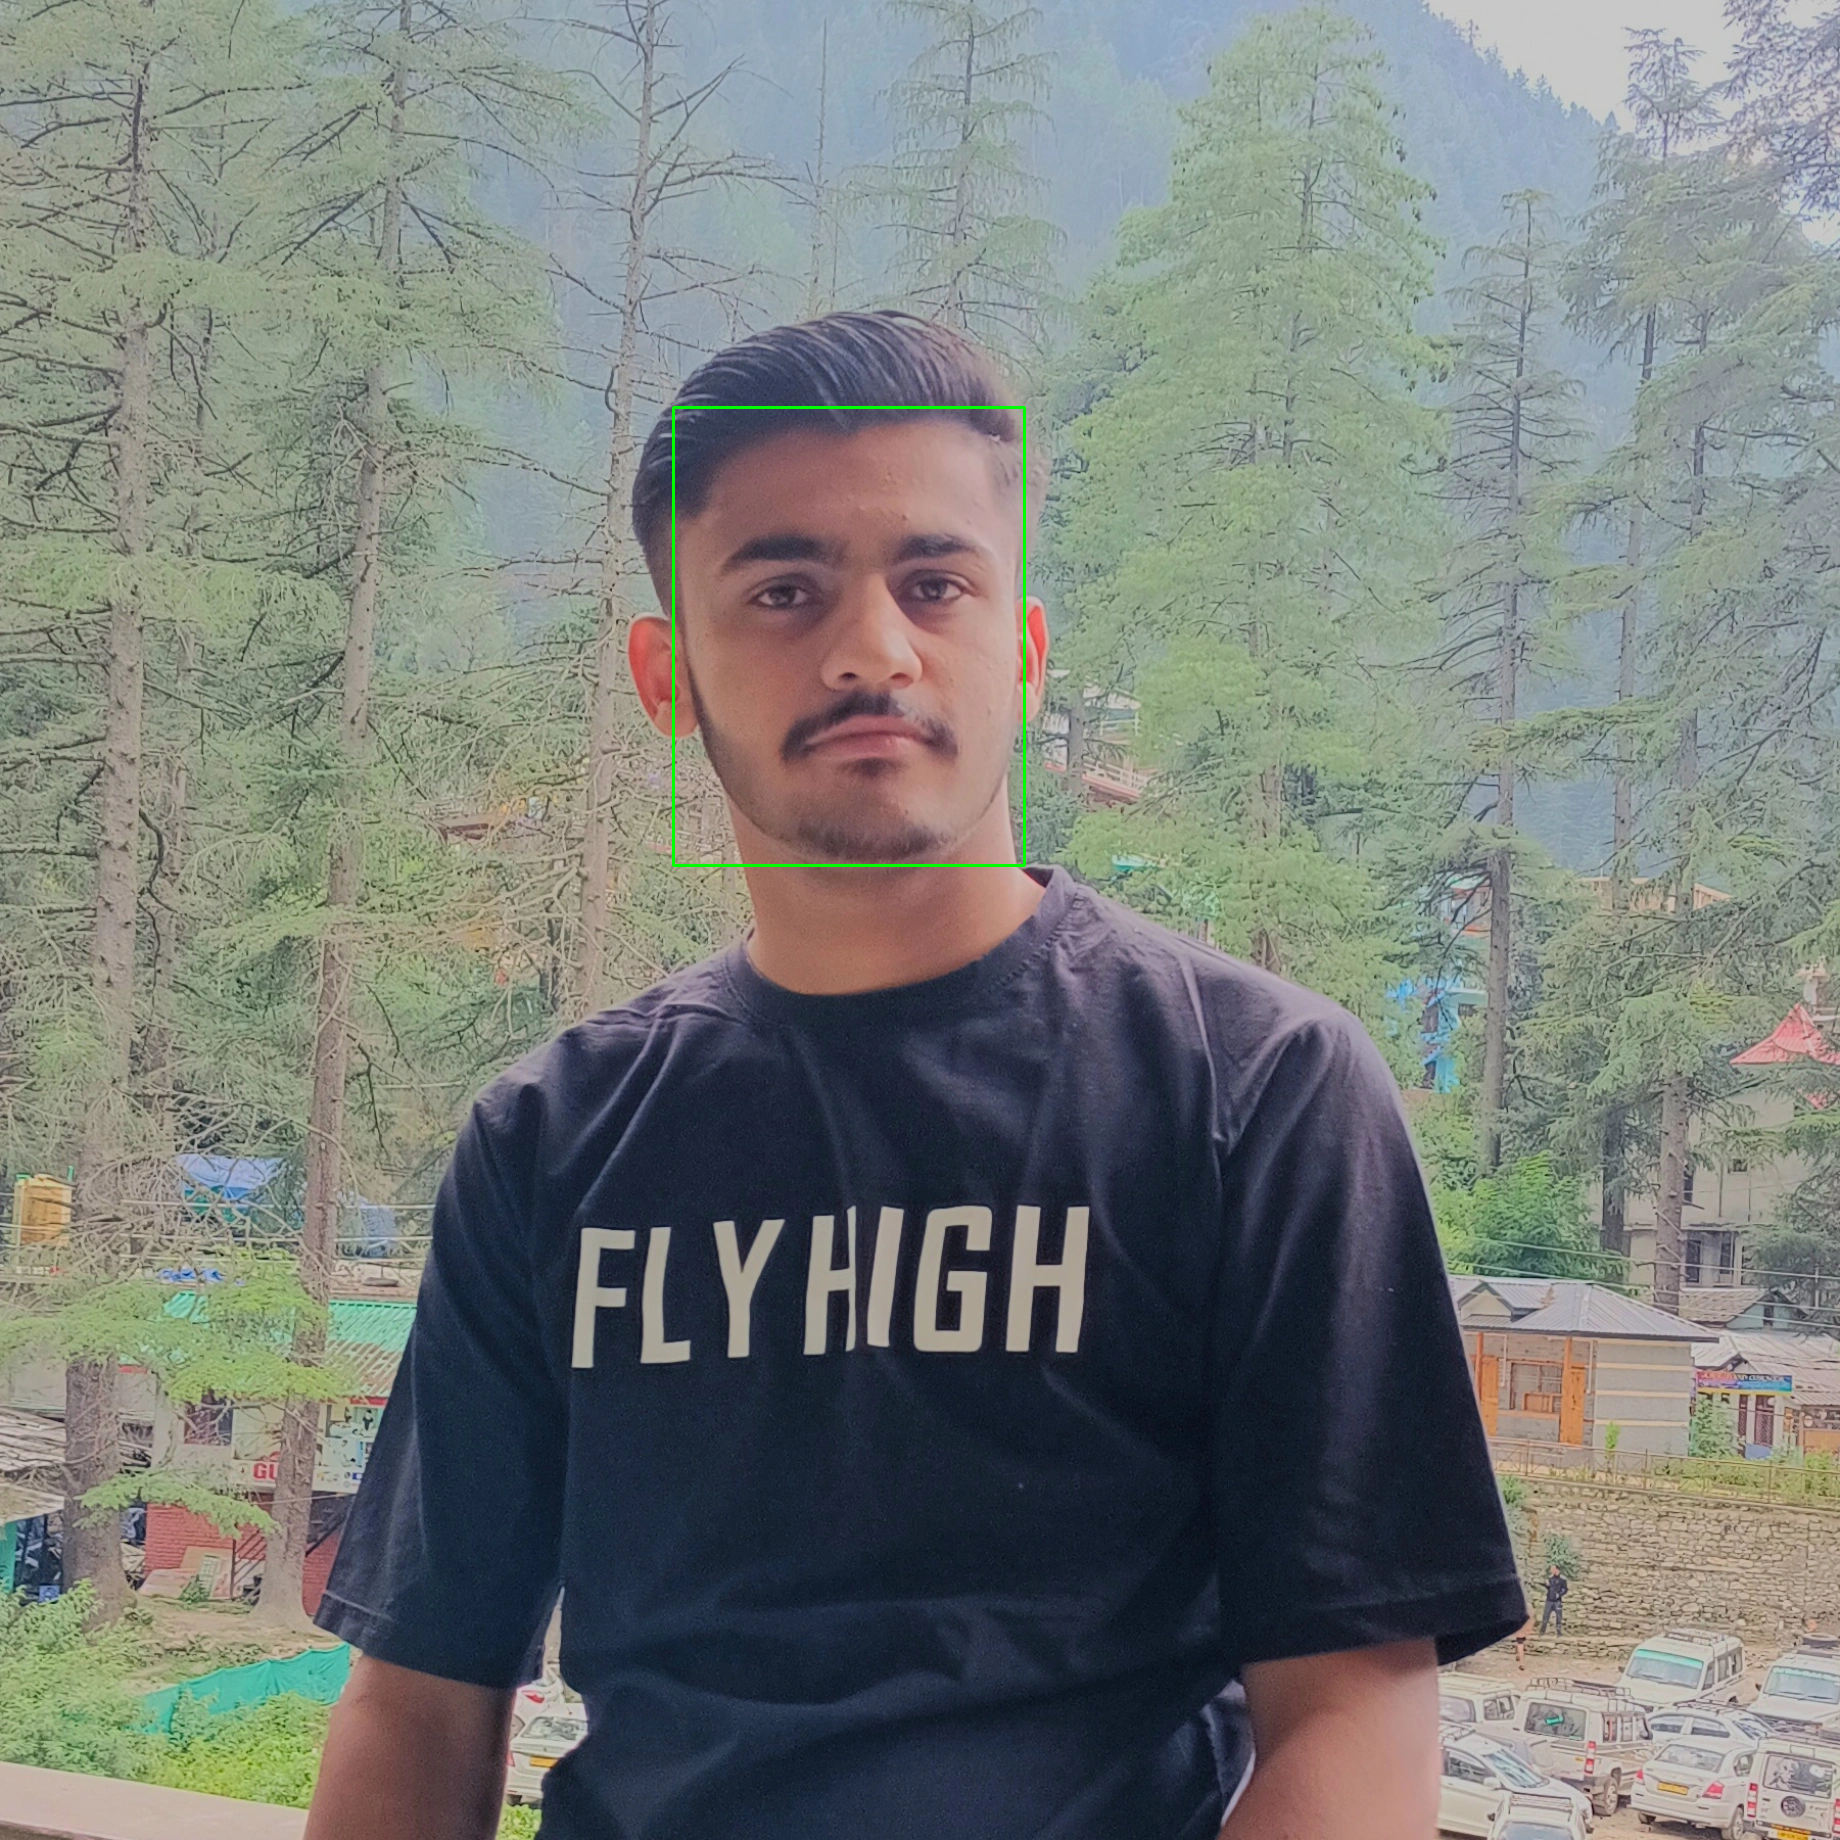

In [15]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

uploaded = files.upload()
image_path = list(uploaded.keys())[0]

net = cv2.dnn.readNetFromCaffe("deploy.prototxt",
                               "res10_300x300_ssd_iter_140000.caffemodel")
image = cv2.imread(image_path)
(h, w) = image.shape[:2]

blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)),
                             1.0, (300, 300),
                             (104.0, 177.0, 123.0))

net.setInput(blob)
detections = net.forward()

for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.5:
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)

cv2_imshow(image)


In [ ]:
# Step 4: Run with Webcam in Google Colab (for macOS)

<IPython.core.display.Javascript object>

Saved to photo.jpg


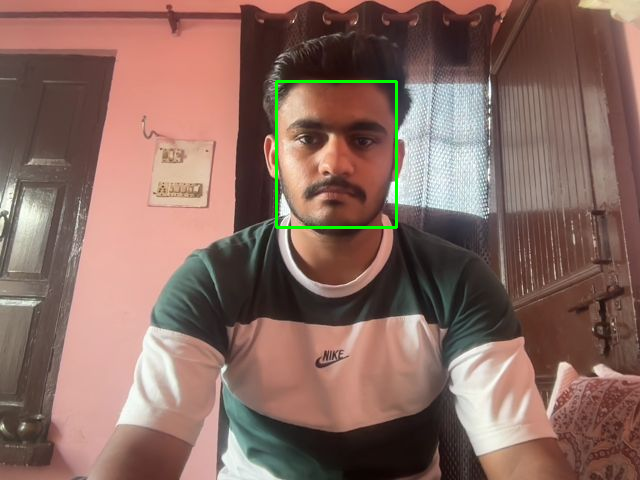

In [18]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import cv2

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

filename = take_photo()
print('Saved to {}'.format(filename))

image = cv2.imread(filename)
(h, w) = image.shape[:2]

blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)),
                             1.0, (300, 300),
                             (104.0, 177.0, 123.0))
net.setInput(blob)
detections = net.forward()

for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.5:
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)

cv2_imshow(image)
